In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/user_behavior_dataset.csv')
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [4]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [5]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [6]:
df.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


In [7]:
df['Device Model'].value_counts()
df['Device Model'] = df['Device Model'].replace('Xiaomi Mi 11', 0)
df['Device Model'] = df['Device Model'].replace('iPhone 12', 1)
df['Device Model'] = df['Device Model'].replace('Google Pixel 5',2)
df['Device Model'] = df['Device Model'].replace('Samsung Galaxy S21',3)
df['Device Model'] = df['Device Model'].replace('OnePlus 9',4)

In [8]:
df['Operating System'].value_counts()
df['Operating System'] = df['Operating System'].replace('Android', 1)
df['Operating System'] = df['Operating System'].replace('iOS', 0)

In [9]:
df['Gender'].value_counts()
df['Gender'] = df['Gender'].replace('Female', 0)
df['Gender'] = df['Gender'].replace('Male', 1)

<Axes: xlabel='Data Usage (MB/day)', ylabel='Count'>

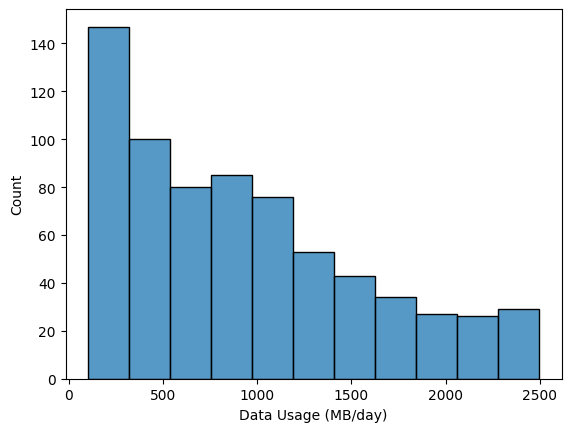

In [10]:
sns.histplot(df['Data Usage (MB/day)'])

In [11]:
df.head(5)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,2,1,393,6.4,1872,67,1122,40,1,4
1,2,4,1,268,4.7,1331,42,944,47,0,3
2,3,0,1,154,4.0,761,32,322,42,1,2
3,4,2,1,239,4.8,1676,56,871,20,1,3
4,5,1,0,187,4.3,1367,58,988,31,0,3


<Axes: >

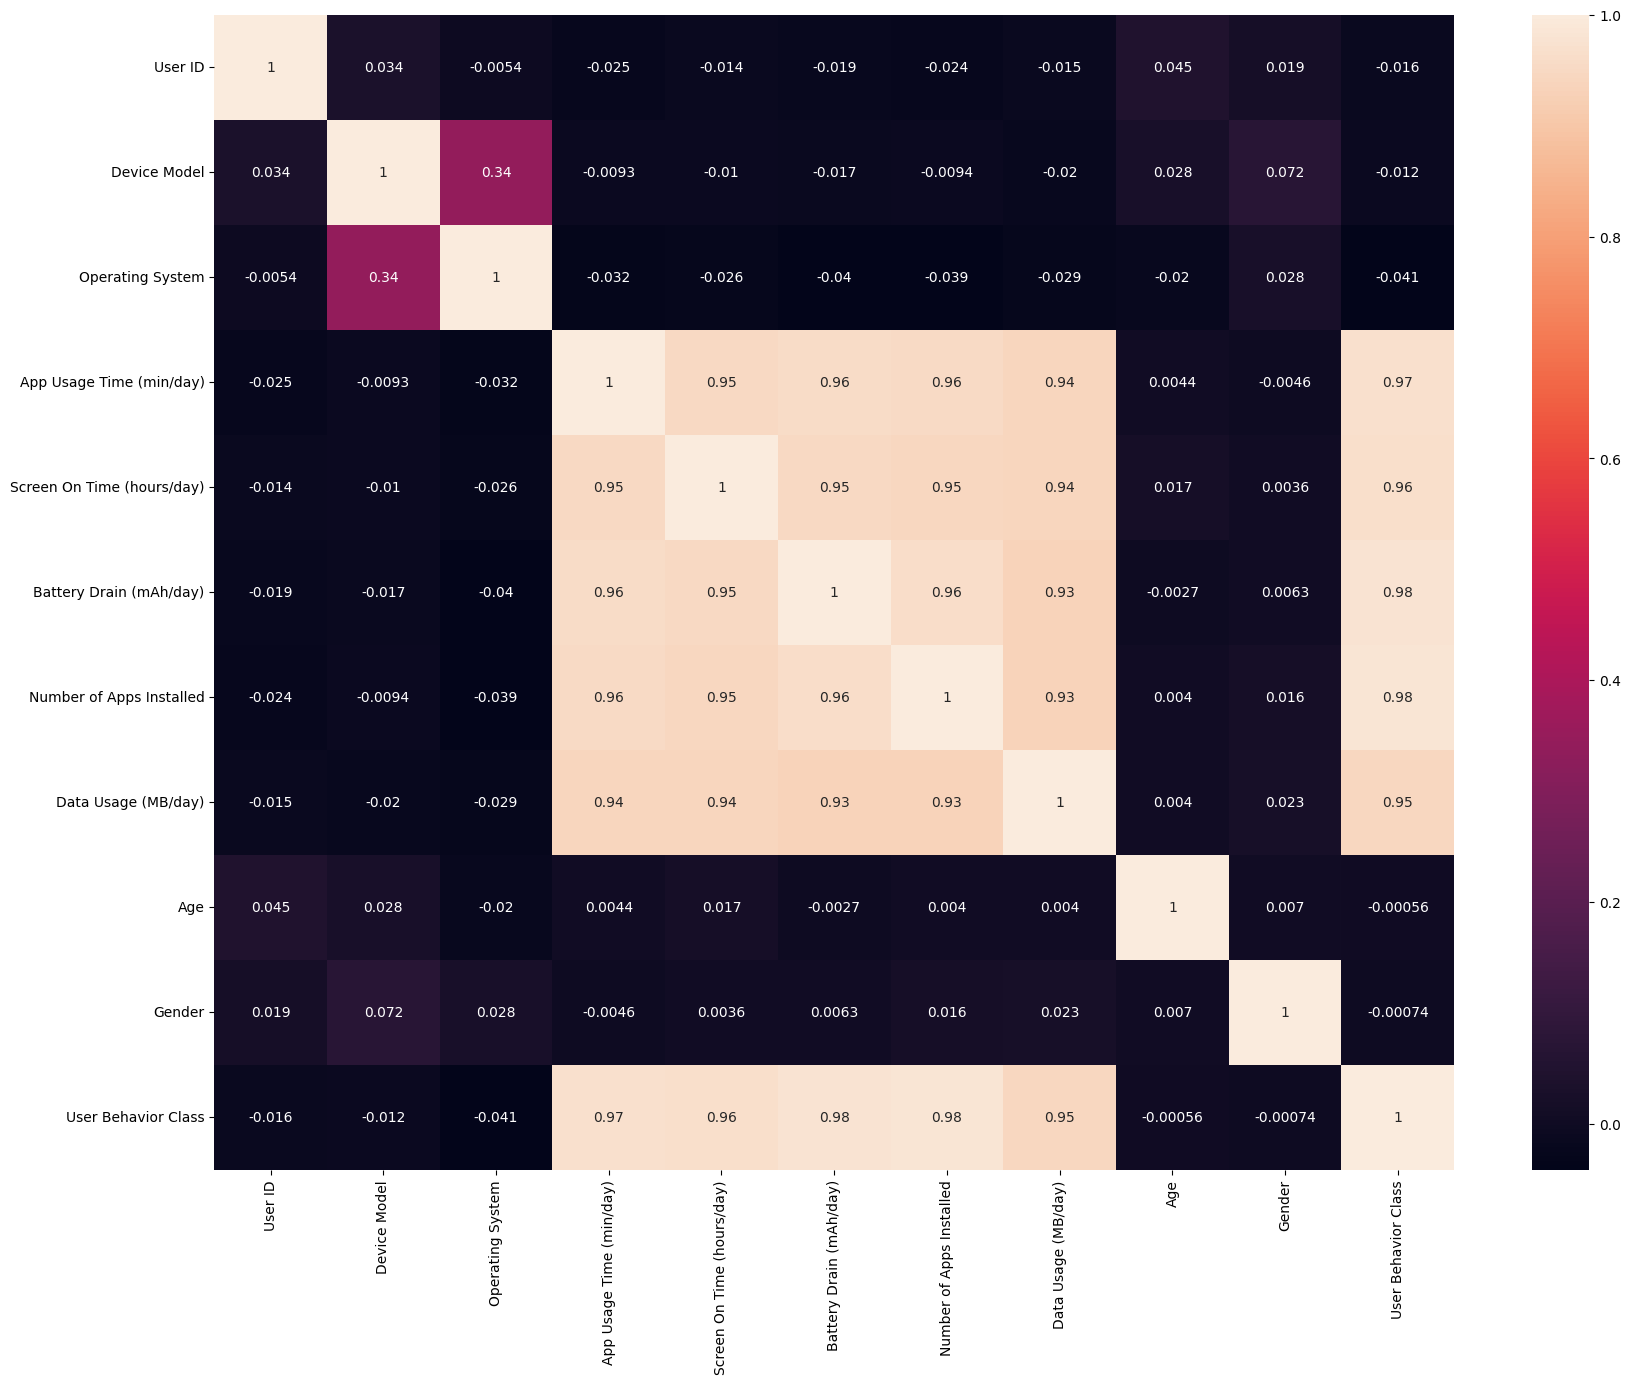

In [12]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(),annot=True)

**Observation**

From the above heatmap we can say that there is no effect of Gender,age,operating system,device-model and user id on the user behaviour

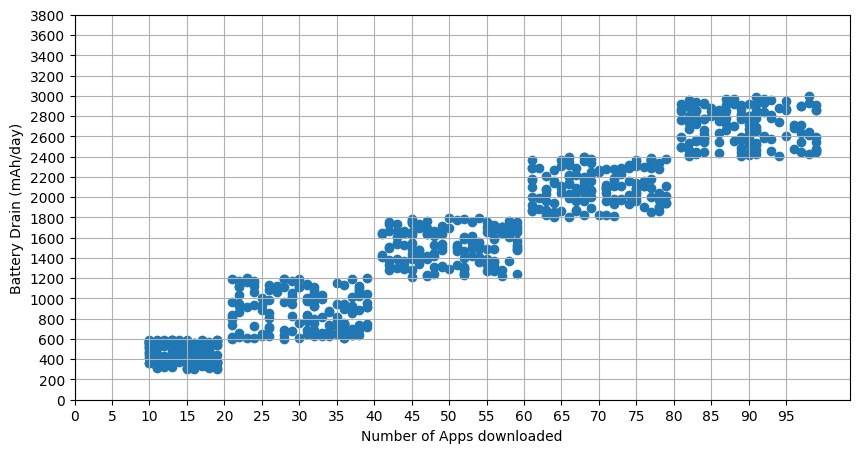

In [13]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Number of Apps Installed'],df['Battery Drain (mAh/day)'])
plt.ylabel('Battery Drain (mAh/day)')
plt.xlabel('Number of Apps downloaded')
plt.xticks(np.arange(0, 100, 5))
plt.yticks(np.arange(0, 4000, 200))
plt.grid()
plt.show()

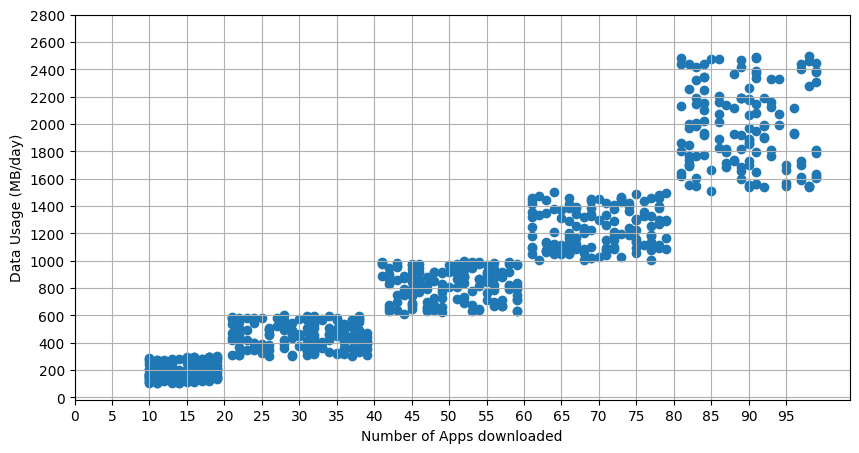

In [14]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Number of Apps Installed'],df['Data Usage (MB/day)'])
plt.ylabel('Data Usage (MB/day)')
plt.xlabel('Number of Apps downloaded')
plt.xticks(np.arange(0, 100, 5))
plt.yticks(np.arange(0, 3000, 200))
plt.grid()
plt.show()

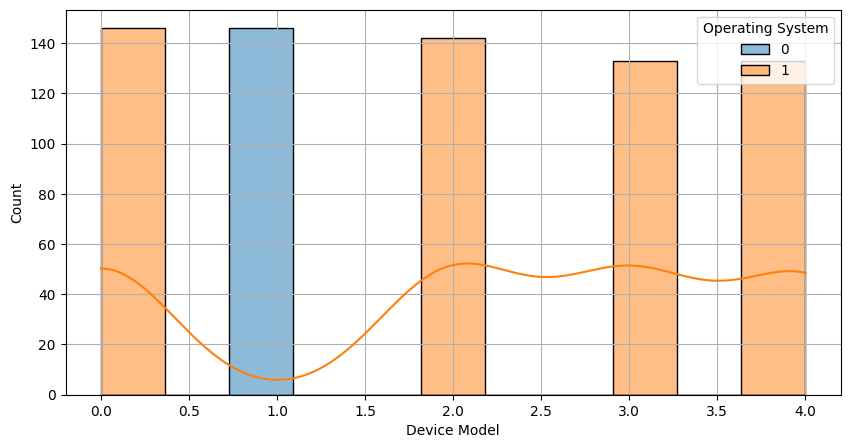

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Device Model', kde=True, hue='Operating System')
plt.grid()
plt.show()

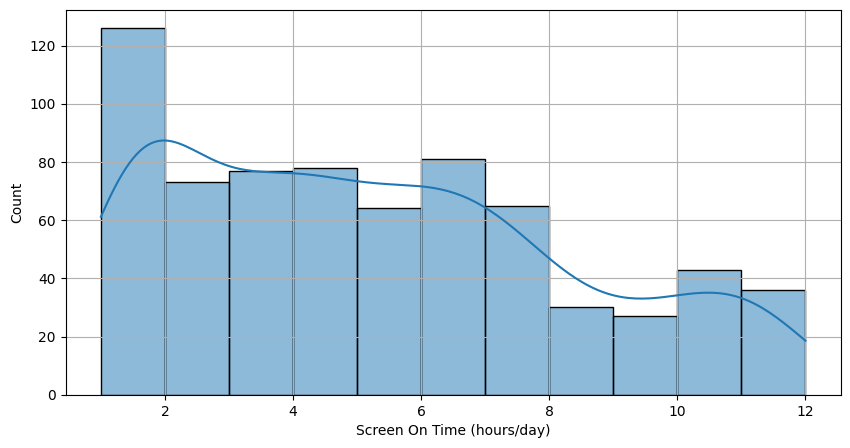

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Screen On Time (hours/day)', kde=True)
plt.grid()
plt.show()

**Model Training**

In [18]:
X = df.drop(['User Behavior Class'],axis=1)
y = df['User Behavior Class']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Logistic Regression**

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7238095238095238
Confusion Matrix:
 [[40  6  0  0  0]
 [ 0 26  6  2  0]
 [ 0  9 28 12  1]
 [ 0  0 13 29  5]
 [ 0  0  0  4 29]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.87      0.93        46
           2       0.63      0.76      0.69        34
           3       0.60      0.56      0.58        50
           4       0.62      0.62      0.62        47
           5       0.83      0.88      0.85        33

    accuracy                           0.72       210
   macro avg       0.74      0.74      0.73       210
weighted avg       0.73      0.72      0.73       210



**Random Forest**

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[46  0  0  0  0]
 [ 0 34  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  0 47  0]
 [ 0  0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        33

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



**SVM**

In [23]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9952380952380953
Confusion Matrix:
 [[46  0  0  0  0]
 [ 0 34  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  1 46  0]
 [ 0  0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        34
           3       0.98      1.00      0.99        50
           4       1.00      0.98      0.99        47
           5       1.00      1.00      1.00        33

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9952380952380953
Confusion Matrix:
 [[46  0  0  0  0]
 [ 0 34  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  1 46  0]
 [ 0  0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        34
           3       0.98      1.00      0.99        50
           4       1.00      0.98      0.99        47
           5       1.00      1.00      1.00        33

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

